In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Credit.csv')
data

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,59,10.354,3480,281,2,70,17,1,0,1,3,333
1,2,251,10.363,2430,191,2,47,18,2,0,1,1,0
2,3,200,10.403,4159,310,3,43,7,1,0,1,1,571
3,4,236,10.503,2923,232,3,25,18,2,0,1,2,191
4,5,263,10.588,4049,296,1,66,13,2,0,1,3,465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,276,163.329,8732,636,3,50,14,1,0,1,3,529
396,397,262,180.379,9310,665,3,67,8,2,1,1,1,1050
397,398,356,180.682,11966,832,2,58,8,2,0,1,2,1405
398,399,324,182.728,13913,982,4,98,17,1,0,1,3,1999


In [3]:
del data["Unnamed: 0"]
print("Student&Married  Yes(1)  No(0)\n "
      "Gender   Male(1) Female(2)\n"
      "Ethnicity  Asian(1) African America (2)  Caucasian(3)\n"
      "Income(/10000$)")
data

Student&Married  Yes(1)  No(0)
 Gender   Male(1) Female(2)
Ethnicity  Asian(1) African America (2)  Caucasian(3)
Income(/10000$)


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,59,10.354,3480,281,2,70,17,1,0,1,3,333
1,251,10.363,2430,191,2,47,18,2,0,1,1,0
2,200,10.403,4159,310,3,43,7,1,0,1,1,571
3,236,10.503,2923,232,3,25,18,2,0,1,2,191
4,263,10.588,4049,296,1,66,13,2,0,1,3,465
...,...,...,...,...,...,...,...,...,...,...,...,...
395,276,163.329,8732,636,3,50,14,1,0,1,3,529
396,262,180.379,9310,665,3,67,8,2,1,1,1,1050
397,356,180.682,11966,832,2,58,8,2,0,1,2,1405
398,324,182.728,13913,982,4,98,17,1,0,1,3,1999


In [4]:
print("Age describe:")
data["Age"].describe()

Age describe:


count    400.000000
mean      55.667500
std       17.249807
min       23.000000
25%       41.750000
50%       56.000000
75%       70.000000
max       98.000000
Name: Age, dtype: float64

In [5]:
print("Rating describe:")
data["Rating"].describe()

Rating describe:


count    400.000000
mean     354.940000
std      154.724143
min       93.000000
25%      247.250000
50%      344.000000
75%      437.250000
max      982.000000
Name: Rating, dtype: float64

In [6]:
print("Balance describe:")
data["Balance"].describe()

Balance describe:


count     400.000000
mean      520.015000
std       459.758877
min         0.000000
25%        68.750000
50%       459.500000
75%       863.000000
max      1999.000000
Name: Balance, dtype: float64

In [7]:
print("Income describe:")
data["Income"].describe()

Income describe:


count    400.000000
mean      45.218885
std       35.244273
min       10.354000
25%       21.007250
50%       33.115500
75%       57.470750
max      186.634000
Name: Income, dtype: float64

In [8]:
region = data.groupby(by=["Ethnicity"])["Cards"].agg(["sum","size"])
region

,sum,size
Ethnicity,,
1,303,102
2,293,99
3,587,199


In [9]:
education = data.groupby(by=["Income"])["Education"].describe()
education

,count,mean,std,min,25%,50%,75%,max
Income,,,,,,,,
10.354,1.0,17.0,NaN,17.0,17.0,17.0,17.0,17.0
10.363,1.0,18.0,NaN,18.0,18.0,18.0,18.0,18.0
10.403,1.0,7.0,NaN,7.0,7.0,7.0,7.0,7.0
10.503,1.0,18.0,NaN,18.0,18.0,18.0,18.0,18.0
10.588,1.0,13.0,NaN,13.0,13.0,13.0,13.0,13.0
...,...,...,...,...,...,...,...,...
163.329,1.0,14.0,NaN,14.0,14.0,14.0,14.0,14.0
180.379,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0
180.682,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0


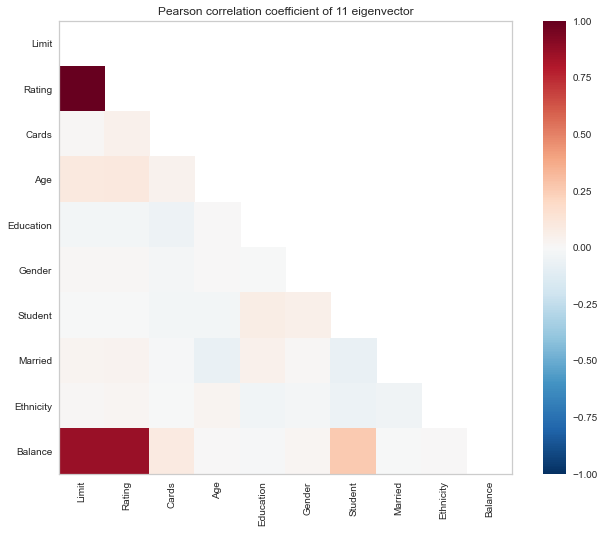

<AxesSubplot:title={'center':'Pearson correlation coefficient of 11 eigenvector'}>

In [10]:
col = len(data)
for i in range(0,col-1):
    data["Gender"]
X,y =data.iloc[:,2:],data.iloc[:,2:]
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='pearson',size=(800, 600),title="Pearson correlation coefficient of 11 eigenvector")
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

f:\python3.9.2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\python3.9.2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
f:\python3.9.2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
 

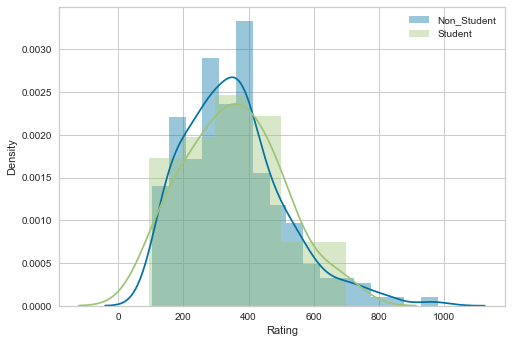

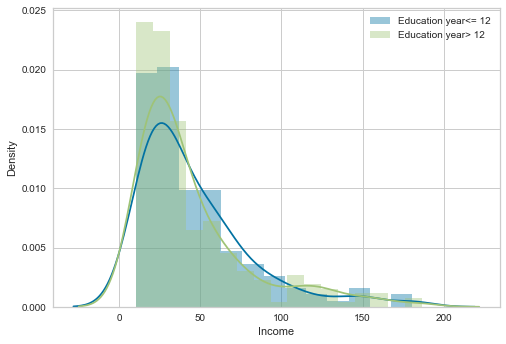

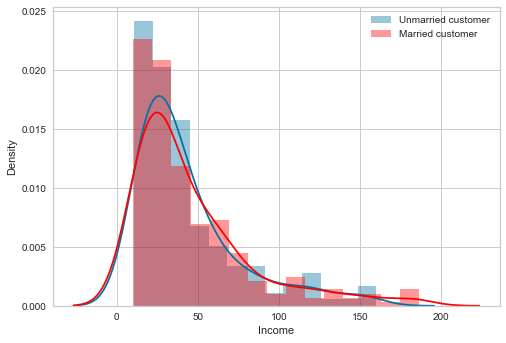

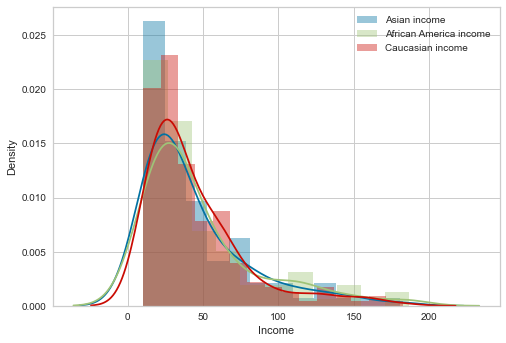

In [11]:
fig = plt.figure()
sns.distplot(data.loc[data["Student"] == 0]["Rating"],label='Non_Student')
sns.distplot(data.loc[data["Student"] == 1]["Rating"],label='Student')
plt.legend()
plt.savefig("StudentRating.png")

fig1 = plt.figure()
sns.distplot(data.loc[data["Education"] <=12]["Income"],label='Education year<= 12')
sns.distplot(data.loc[data["Education"] >12 ]["Income"],label='Education year> 12')
plt.legend()
plt.savefig("EducationI.png")

fig2 = plt.figure()
sns.distplot(data.loc[data["Married"] == 0]["Income"],label='Unmarried customer')
sns.distplot(data.loc[data["Married"] == 1]["Income"],label='Married customer',color='red')
plt.legend()
plt.savefig("MarriedIn.png")

fig3 = plt.figure()
sns.distplot(data.loc[data["Ethnicity"] == 1]["Income"],label='Asian income')
sns.distplot(data.loc[data["Ethnicity"] == 2]["Income"],label='African America income')
sns.distplot(data.loc[data["Ethnicity"] == 3]["Income"],label='Caucasian income')
plt.legend()
plt.savefig("regionIn.png")

The heatmap of the original data


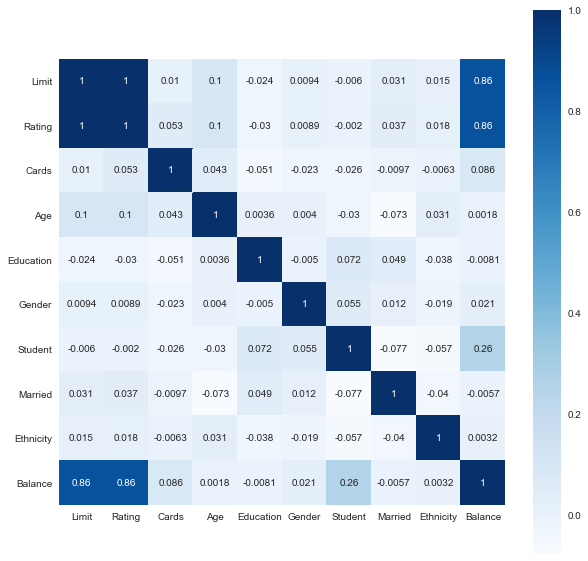

In [12]:
data1 = data.iloc[:,2:]
correlation = data1.corr()
print("The heatmap of the original data")
fig,axi = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 300
sns.heatmap(correlation, annot= True, annot_kws={'size':10},cmap='Blues',square=True,ax=axi)
# sns.pairplot(data)
plt.savefig("heat.jpeg")
plt.show()


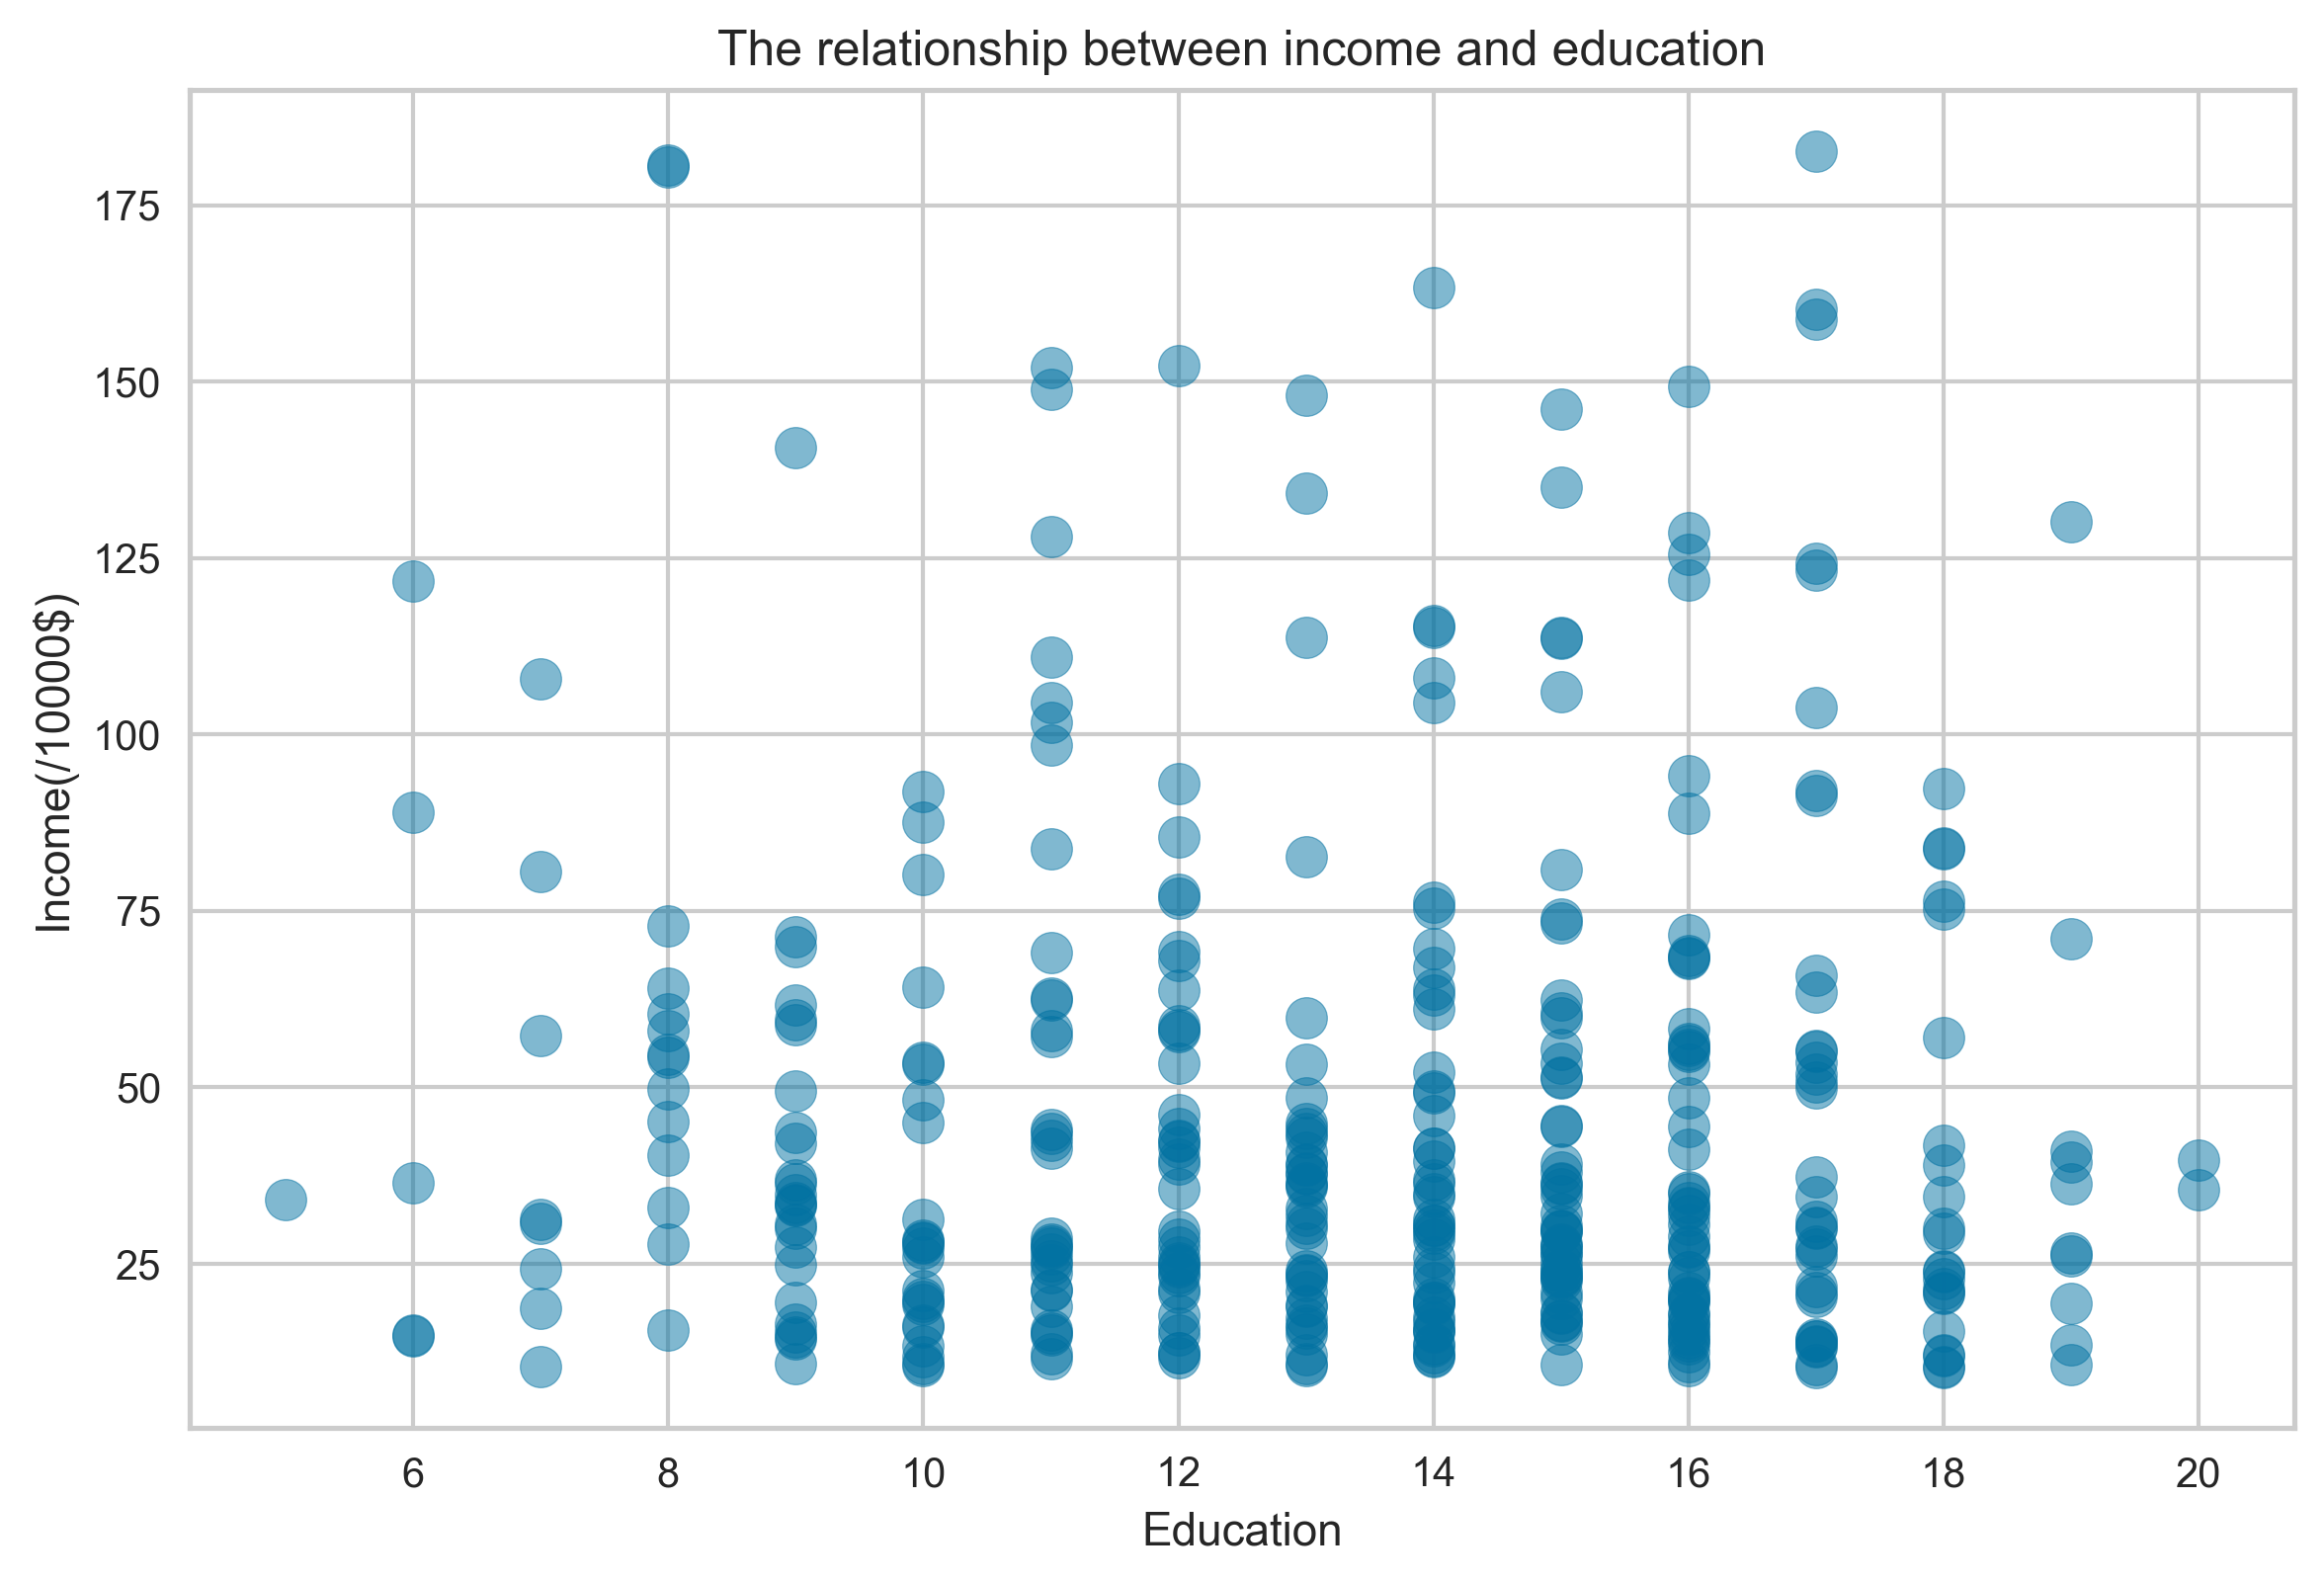

In [13]:
col = len(data)
education = []
income =[]
lmit = []
rate = []
balance = []
fig = plt.figure()
for i in range(0, col-1):
    education.append(data["Education"][i])
    income.append(data["Income"][i])
    lmit.append(data["Limit"][i])
    rate.append(data["Rating"][i])
    balance.append(data["Balance"][i])
plt.scatter(education,income,s =100,marker='o',alpha=0.5)
plt.grid(True)
plt.title("The relationship between income and education")
plt.xlabel("Education")
plt.ylabel("Income(/10000$)")
plt.tight_layout()
plt.savefig("EI.jpeg")
plt.show()

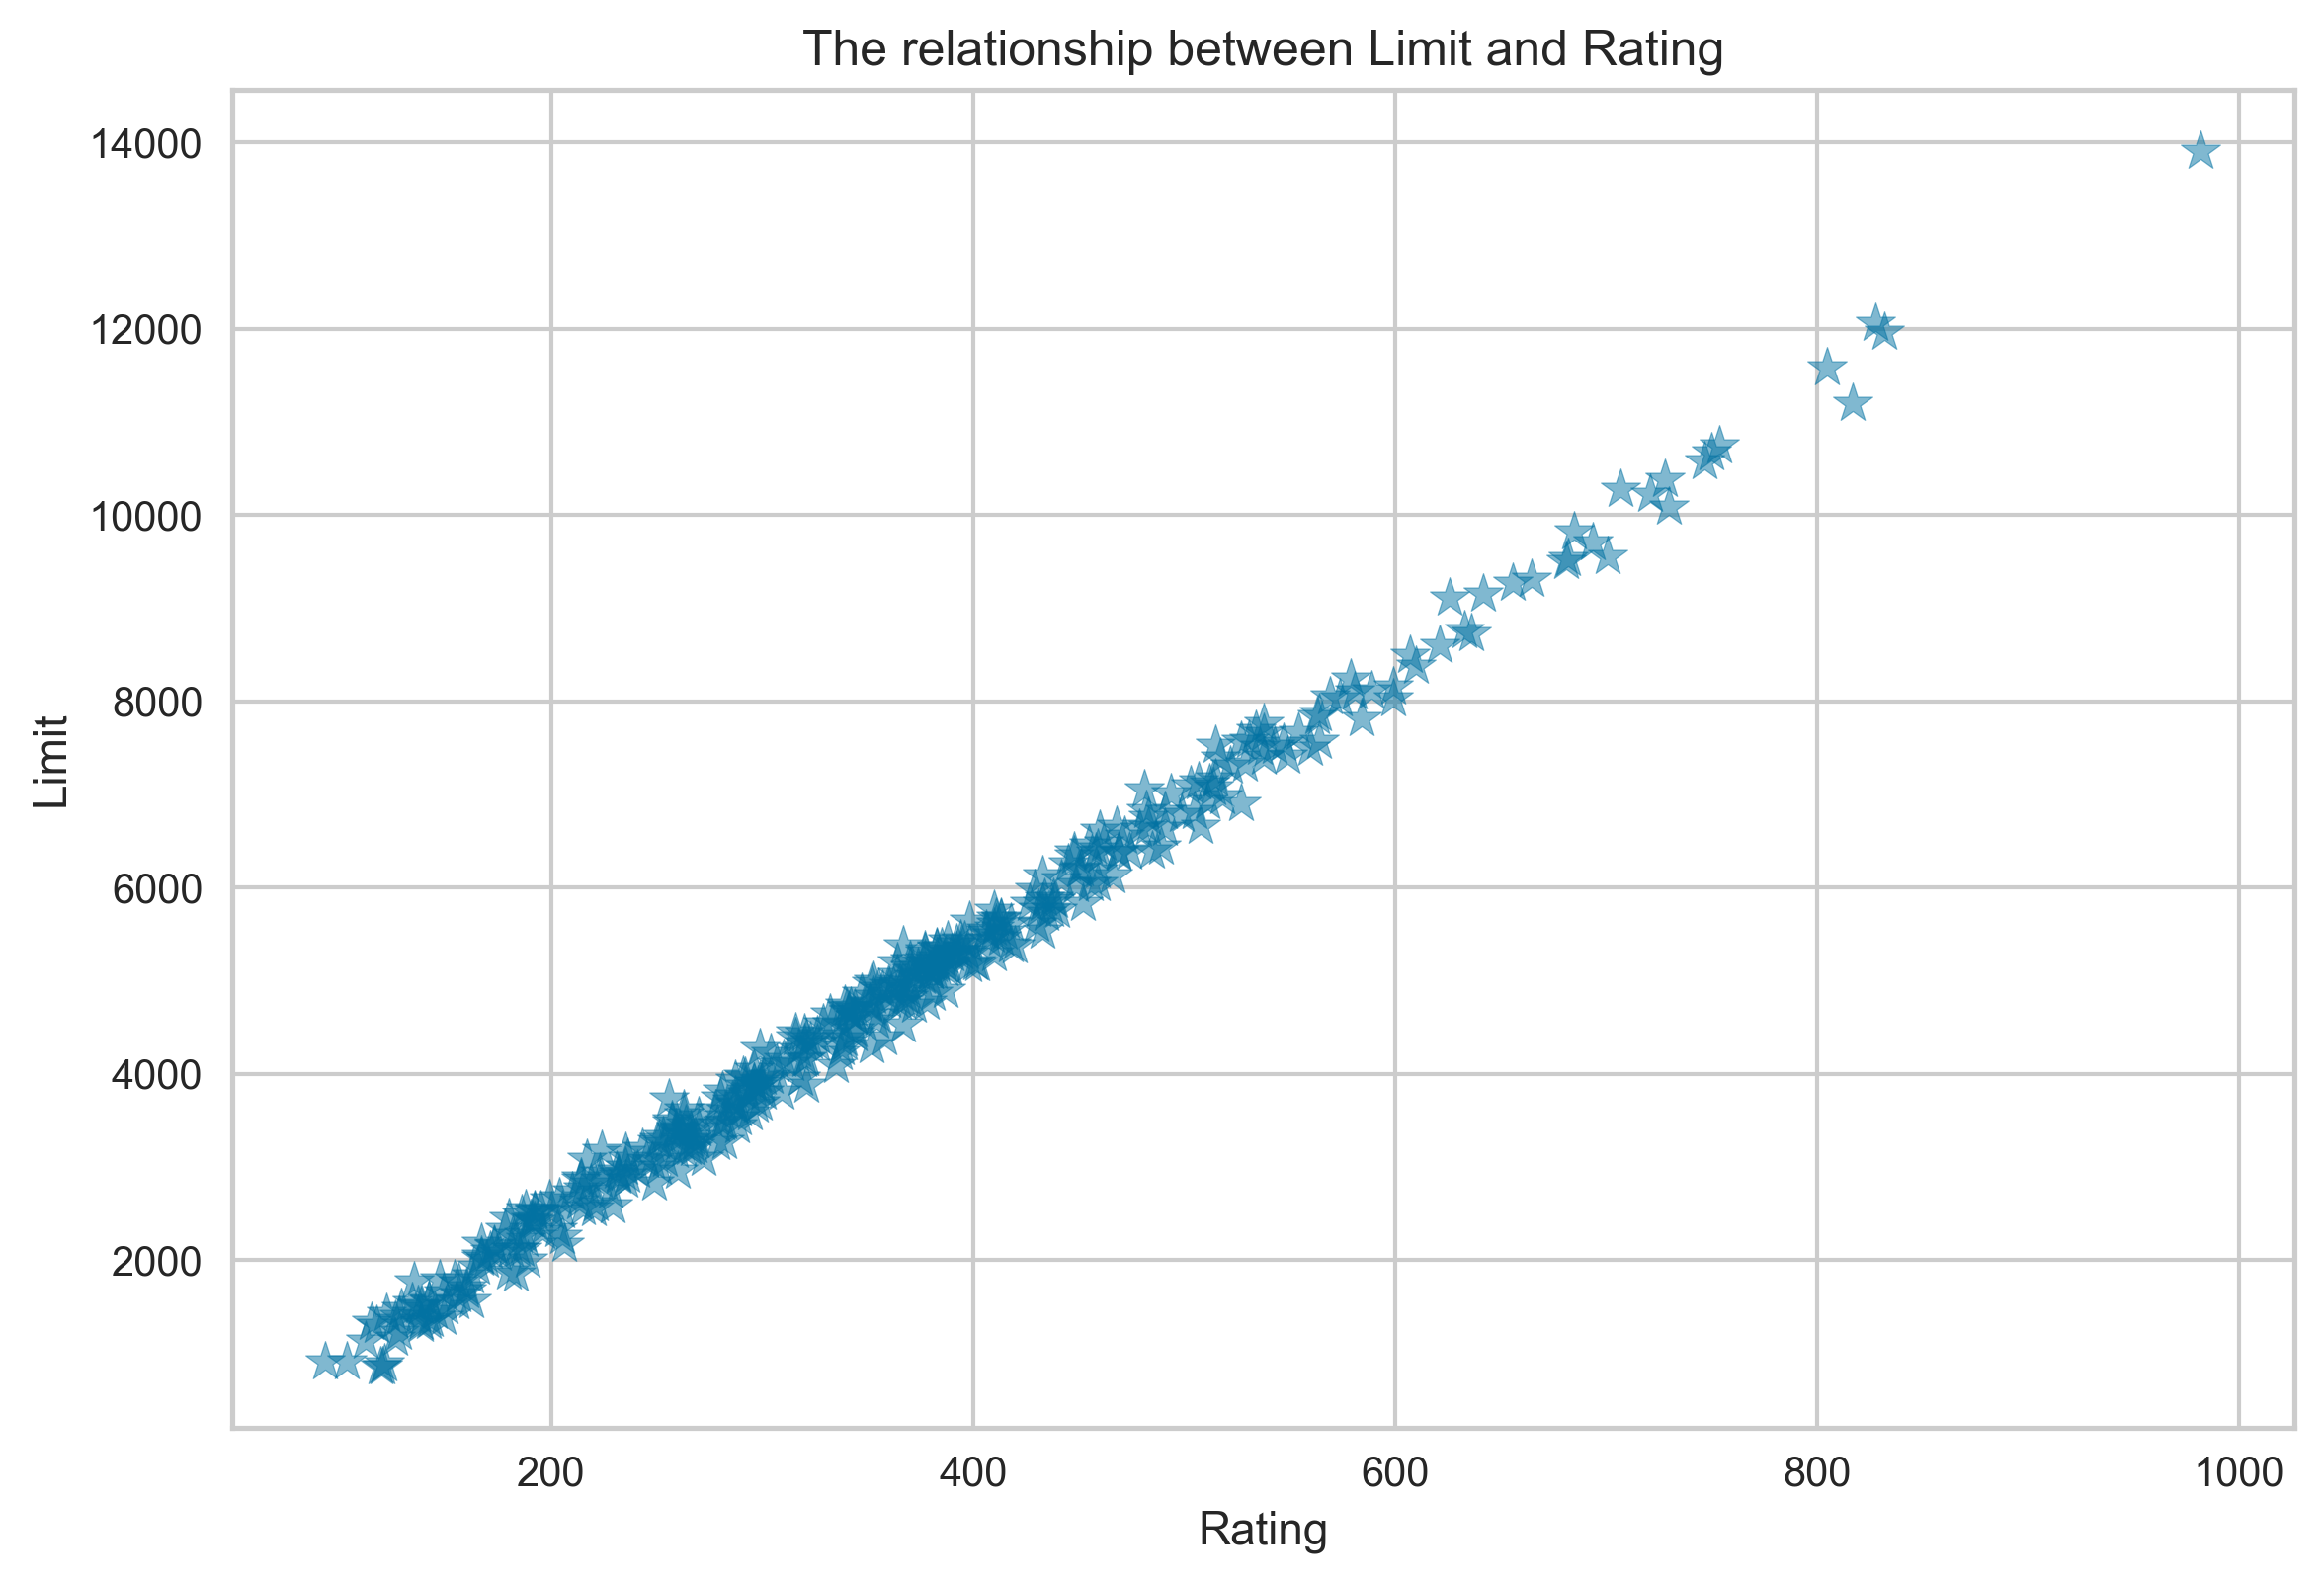

In [14]:
plt.scatter(rate,lmit,s =100,marker='*',alpha=0.5)
plt.grid(True)
plt.title("The relationship between Limit and Rating")
plt.xlabel("Rating")
plt.ylabel("Limit")
plt.tight_layout()
plt.savefig("RL.jpeg")
plt.show()

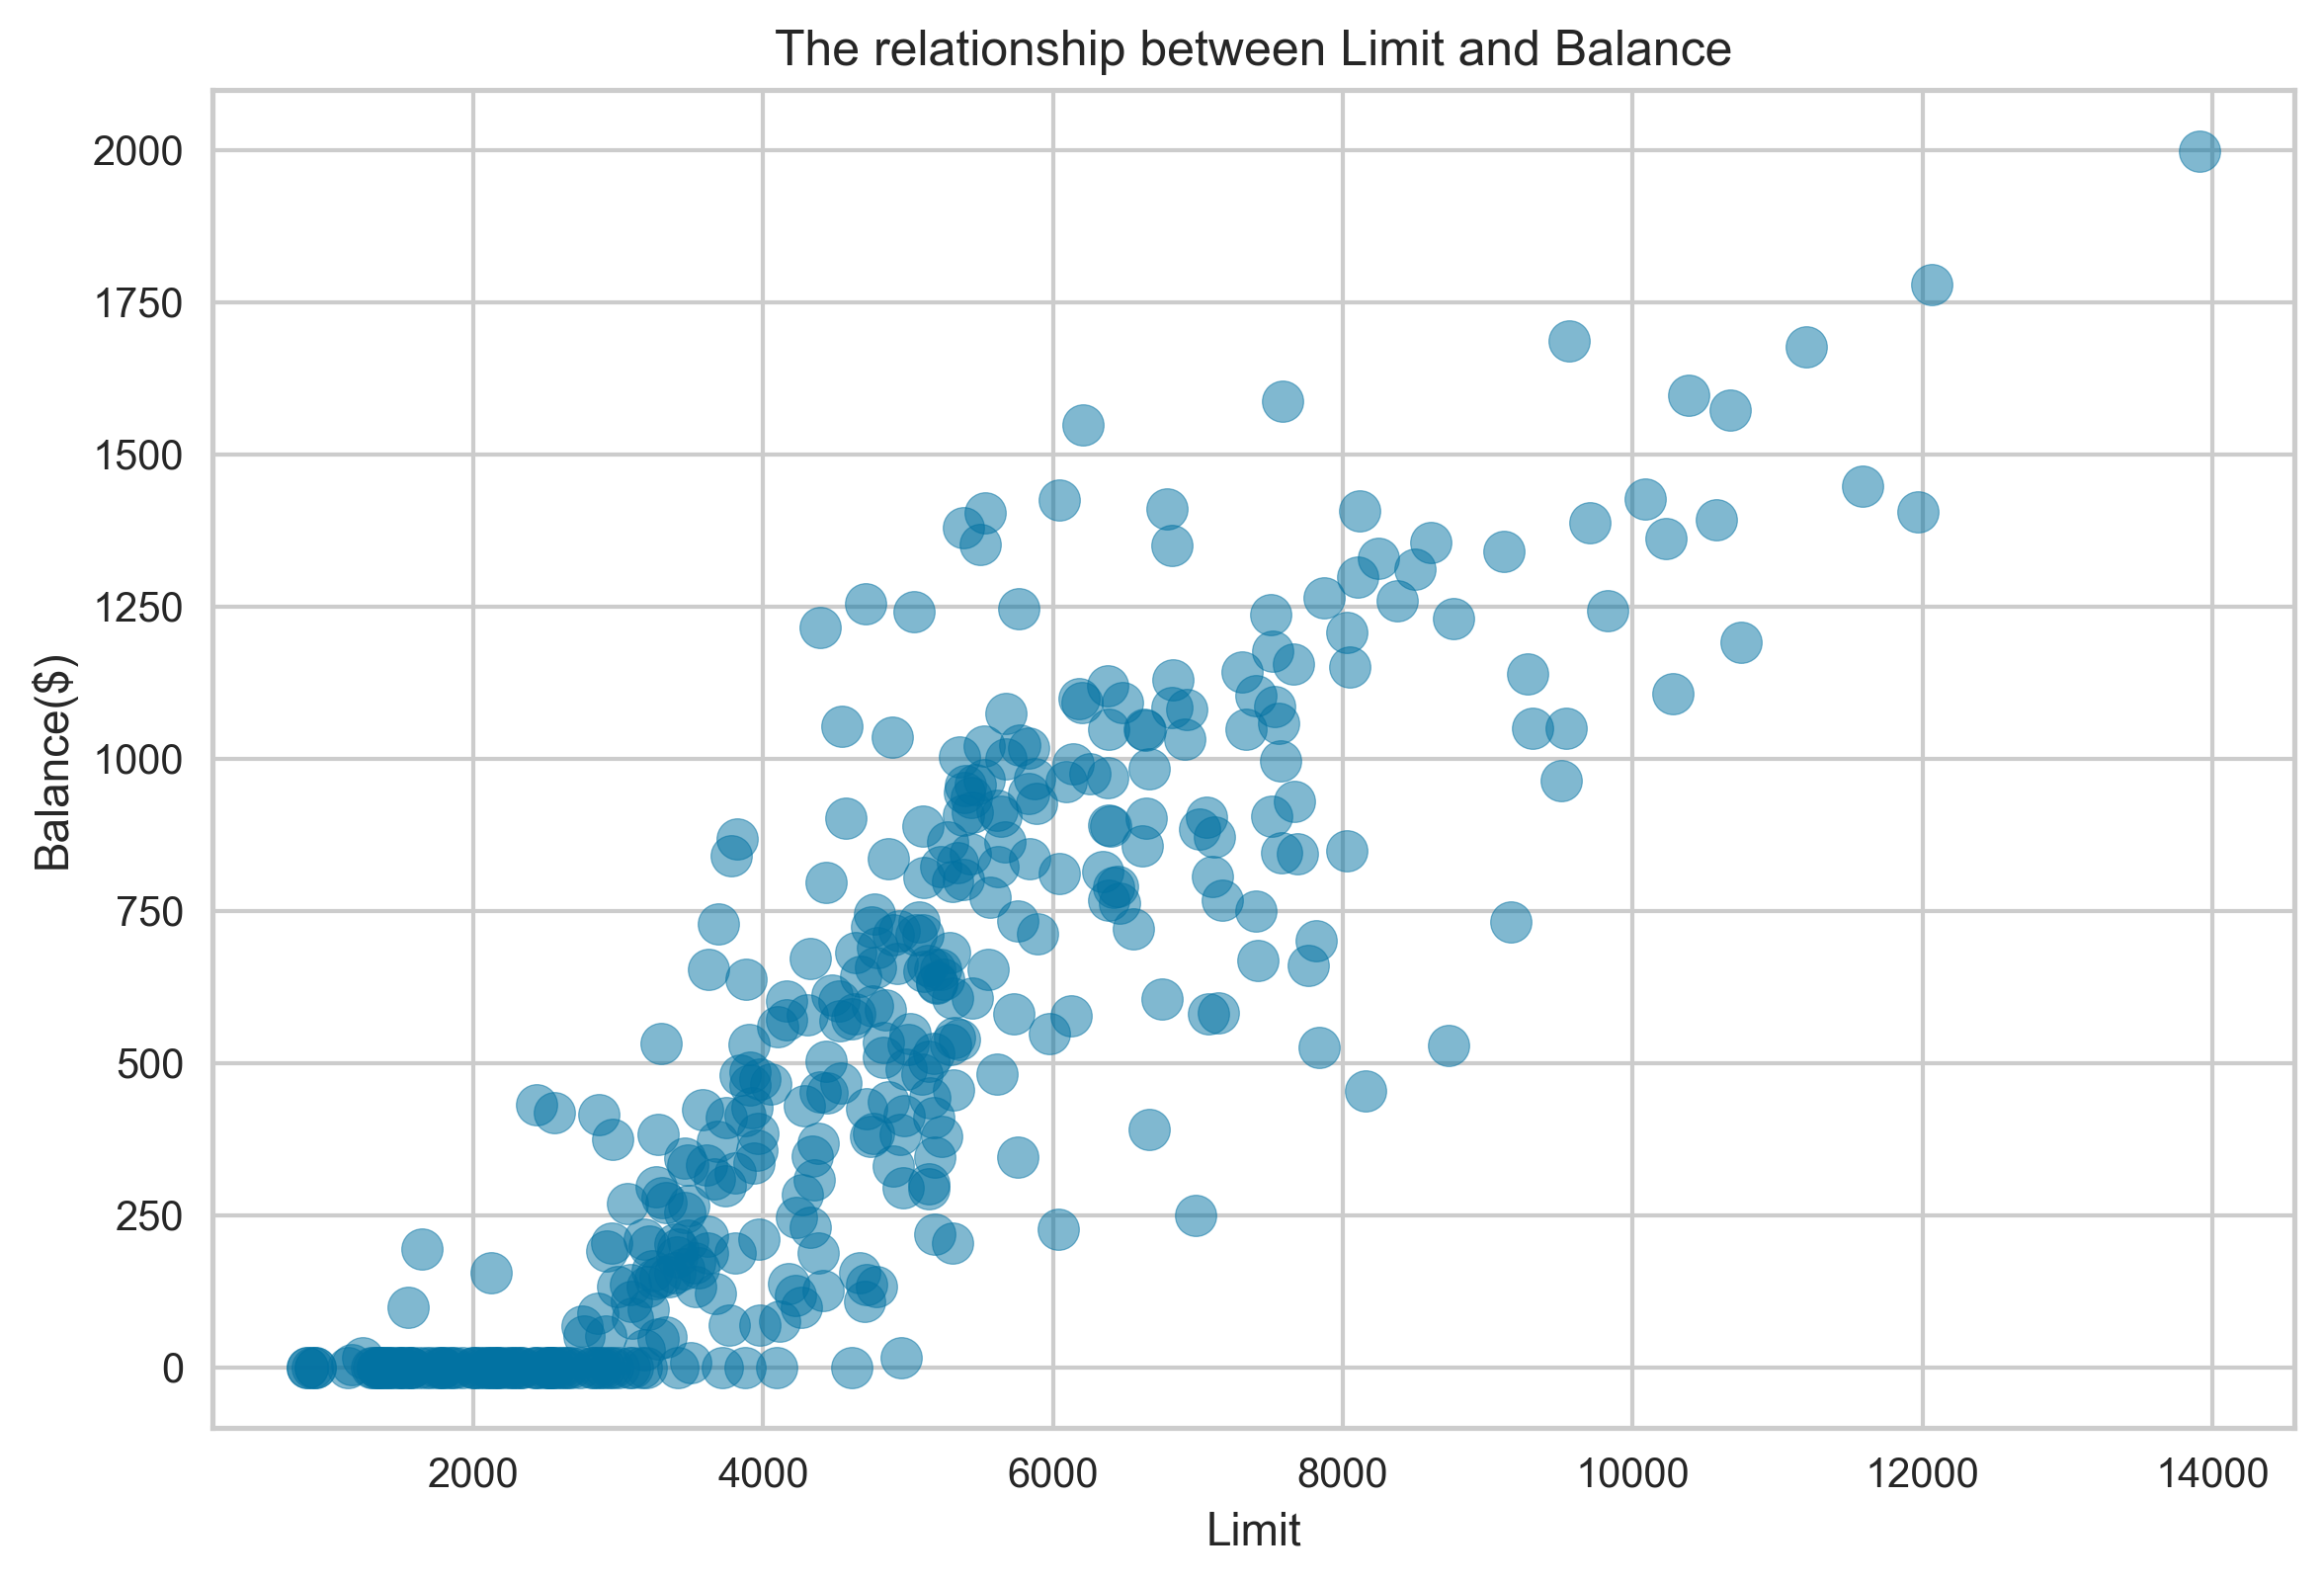

In [15]:
plt.scatter(lmit,balance,s =100,marker='o',alpha=0.5)
plt.grid(True)
plt.title("The relationship between Limit and Balance")
plt.xlabel("Limit")
plt.ylabel("Balance($)")
plt.tight_layout()
plt.savefig("LB.jpeg")
plt.show()

In [16]:
dataout1 = list(zip(lmit,rate,balance))
dataout1 = np.array(dataout1)
dataout1

array([[ 3480,   281,   333],
       [ 2430,   191,     0],
       [ 4159,   310,   571],
       ...,
       [ 9310,   665,  1050],
       [11966,   832,  1405],
       [13913,   982,  1999]], dtype=int64)

No handles with labels found to put in legend.


 The predict label: 
 [1 1 2 1 2 1 1 1 2 1 2 2 2 2 1 1 2 1 2 1 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 2 1
 1 2 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 2 2 1 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1
 1 1 2 1 1 1 1 2 2 2 2 1 1 2 2 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 2 2 2 2 1 1
 2 1 1 2 1 1 2 1 2 2 1 1 2 2 2 1 1 2 1 1 1 2 2 2 1 2 2 1 1 1 1 2 1 2 2 1 2
 1 1 1 1 0 1 1 1 2 1 1 2 2 2 1 2 1 2 1 2 1 1 2 1 1 2 2 1 1 1 0 1 2 1 1 2 2
 2 1 1 1 1 1 1 1 2 0 1 2 2 1 1 2 0 0 2 2 0 1 1 2 1 2 1 1 2 0 1 2 1 1 1 2 1
 2 2 0 0 2 0 1 0 1 2 2 1 1 2 2 1 2 0 2 2 2 1 2 1 1 2 2 0 2 2 2 1 2 1 0 2 2
 2 1 1 2 2 2 2 0 2 2 0 2 0 0 0 2 0 2 2 2 2 0 2 1 1 2 2 2 1 1 2 2 1 2 0 2 2
 2 2 1 2 2 0 2 0 2 0 0 0 2 0 1 2 0 2 2 0 0 0 0 0 2 2 0 2 2 2 0 2 0 2 0 0 0
 0 0 0 0 0 0 0 2 2 2 2 0 0 2 2 0 0 0 0 2 0 2 2 3 0 2 0 0 0 0 0 0 0 0 0 3 2
 0 0 0 3 0 3 0 3 0 3 3 0 3 3 0 3 3 3 0 3 3 3 3 3 3 0 3 3 3]
The centroid: 
 [[ 7132.09459459   515.27027027   969.86486486]
 [ 2479.88111888   204.8041958     76.8041958 ]
 [ 4843.05590062   361.34782609   589.39130435]
 [10414.

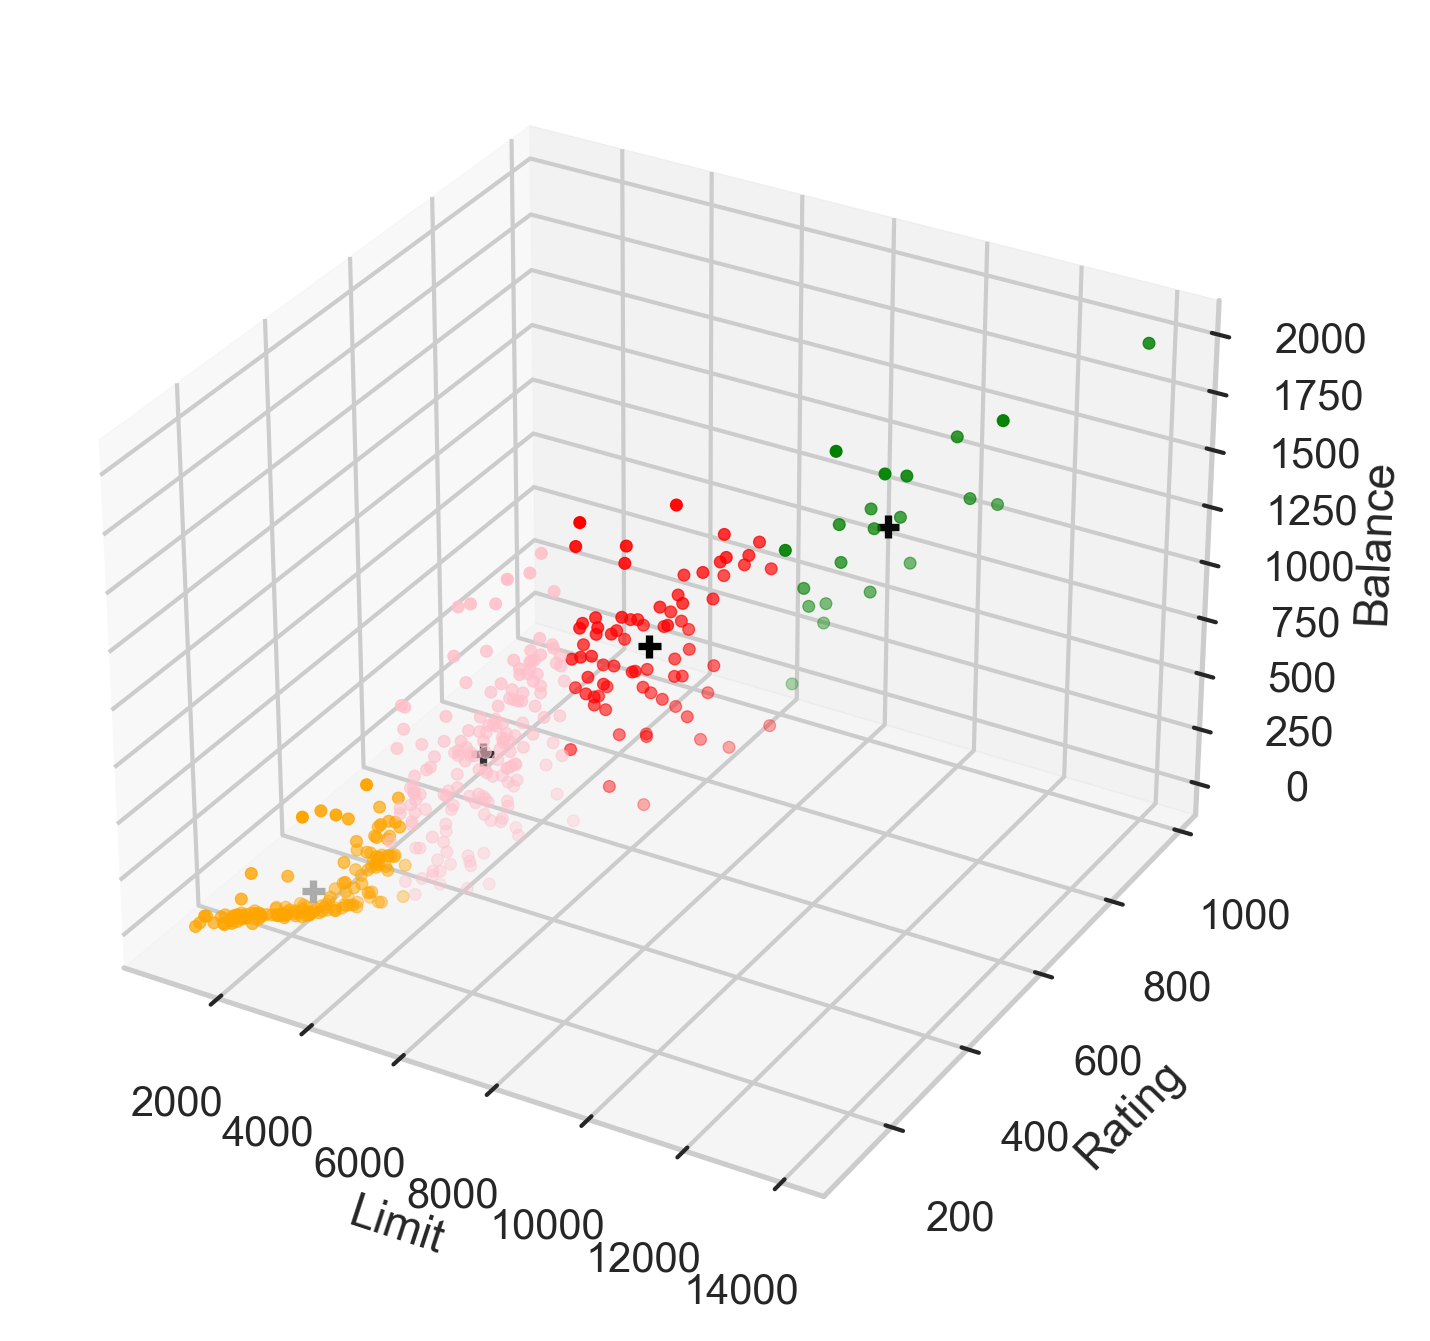

In [19]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters= 4,random_state=0).fit(dataout1)
y_pred = cluster.labels_
print(" The predict label: \n",y_pred)
color = ['red','orange','pink','green']
fig = plt.figure()
axi1 = plt.axes(projection = '3d')
for i in range(4):
    axi1.scatter(dataout1[y_pred==i,0],dataout1[y_pred==i,1],dataout1[y_pred==i,2],marker='o',s = 8,c= color[i])
# centroid
centroid = cluster.cluster_centers_
print("The centroid: \n",centroid)
print("\n The original data ")
axi1.scatter(centroid[:,0],centroid[:,1],centroid[:,2],marker='+',s=30,c='black')
axi1.set_ylabel("Rating")
axi1.set_xlabel("Limit")
axi1.set_zlabel("Balance")
plt.legend()
plt.savefig("predict.png")
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
